<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Python_para_Data_Science/blob/main/Data_Visualization_Explorando_com_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando e traduzindo os dados**

**Importando os dados**

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('tips.csv')

In [ ]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


**Traduzindo colunas e campos**

In [ ]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


**Comparando distribuições de maneira exploratória**

**Seaborn e scatterplot**

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import seaborn as sns

In [ ]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

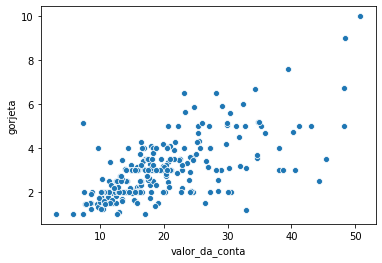

In [ ]:
sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

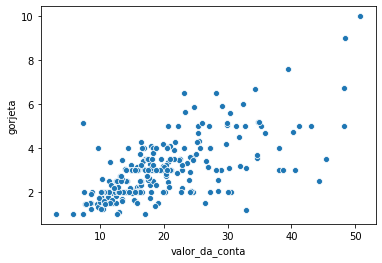

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

In [ ]:
print('A base de dados contém {} registros'.format(gorjetas.shape[0]))

A base de dados contém 244 registros


In [ ]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

**Coluna porcentagem**

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


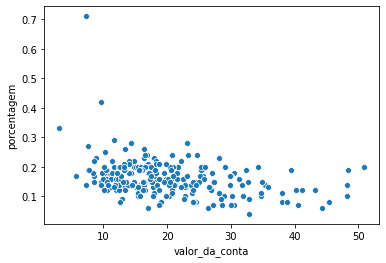

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# **Analisando de forma visual e descritiva**

**Análise descritiva**

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


**Análise visual**

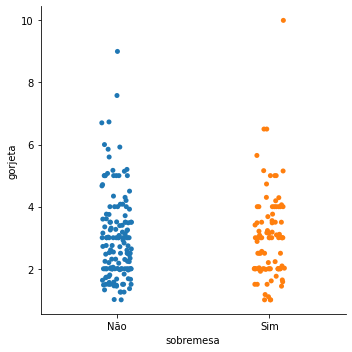

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

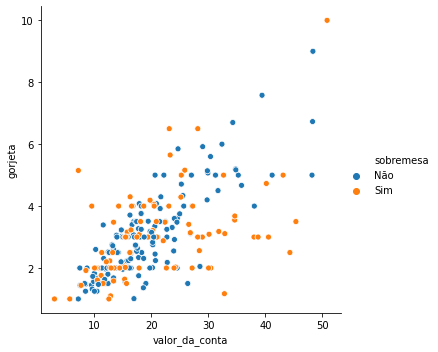

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

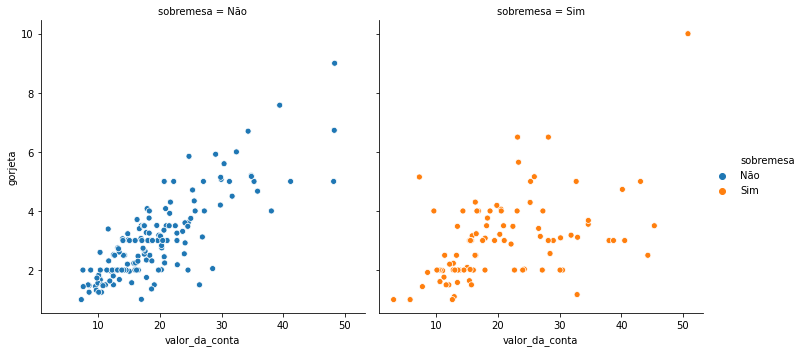

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

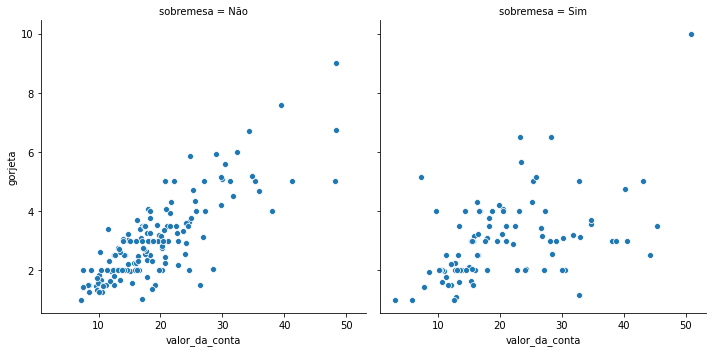

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

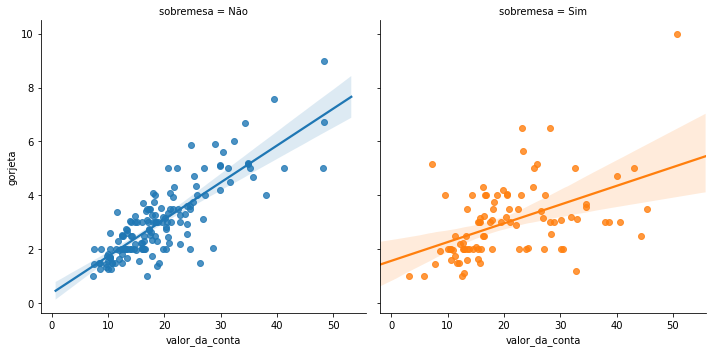

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

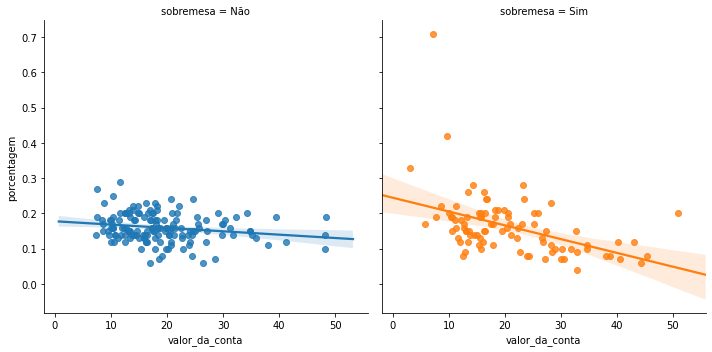

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

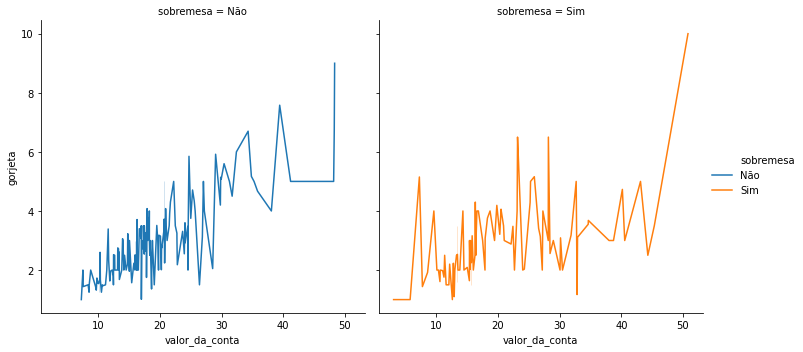

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

**Teste de hipótese**

In [ ]:
from scipy.stats import ranksums

In [ ]:
gorjetas.query("sobremesa == 'Sim'").porcentagem

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [ ]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


# **Comparando e explorando os dias da semana**

**Dias da semana**

In [ ]:
gorjetas["dia_da_semana"].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

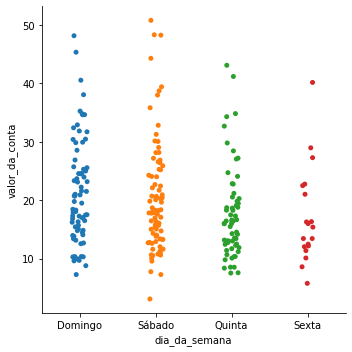

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

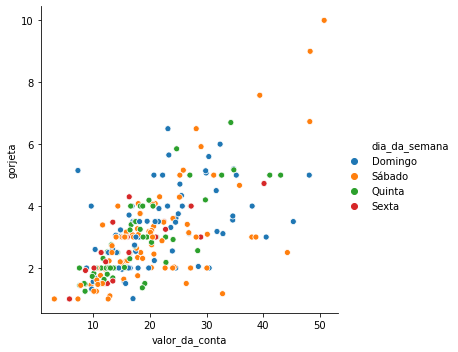

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

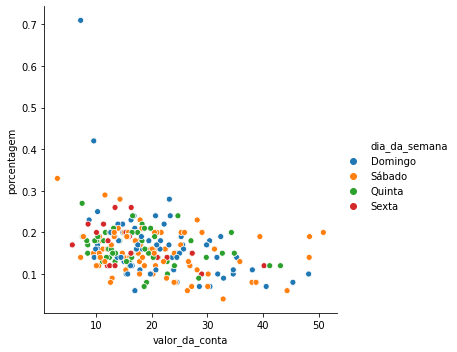

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

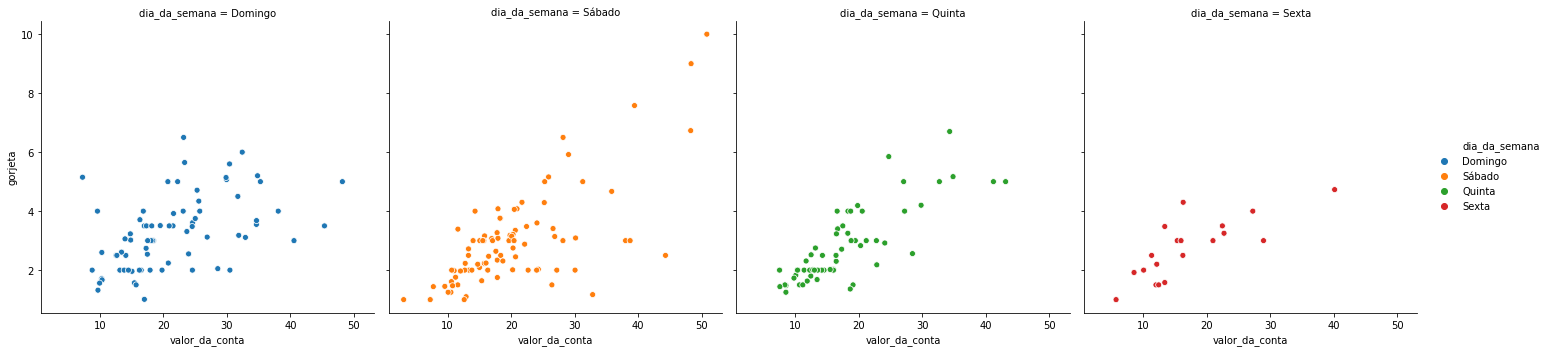

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

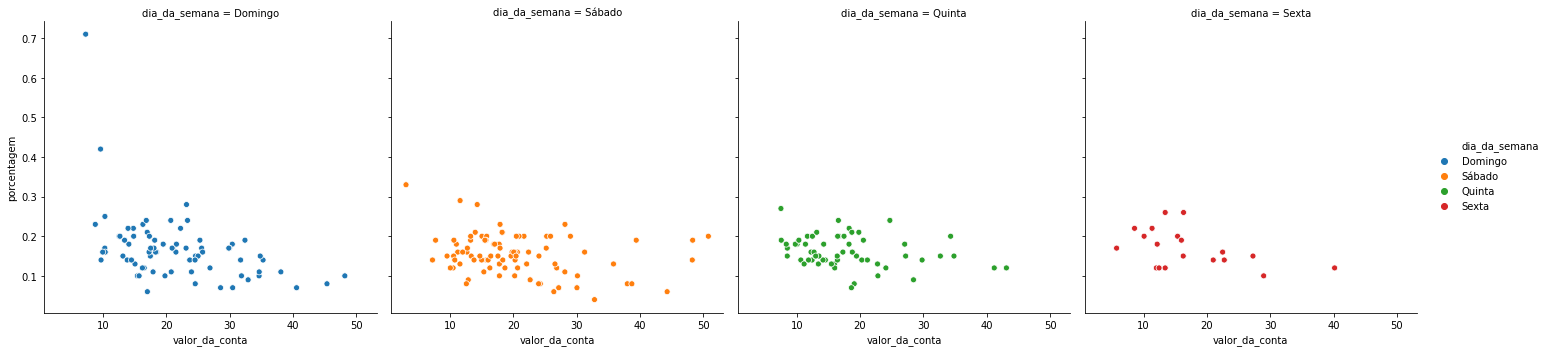

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

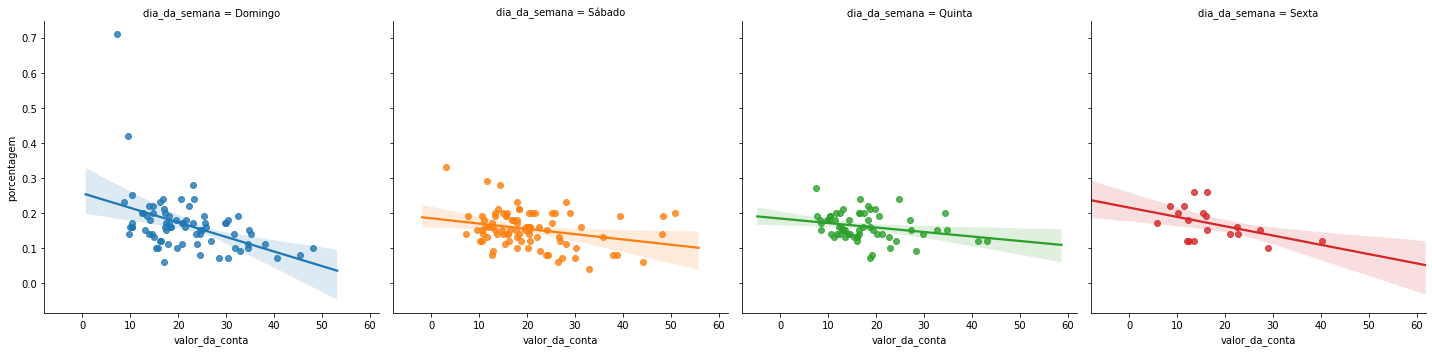

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

**Análise descritiva**

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [ ]:
gorjetas.dia_da_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

**Teste de hipótese**

In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta

In [ ]:
ranksums(valor_conta_domingo, valor_conta_sabado)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


RanksumsResult(statistic=nan, pvalue=nan)

In [ ]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é nan


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


# **Distribuição de frequência e teste de hipótese**

**Distplot, boxplot e violinplot**

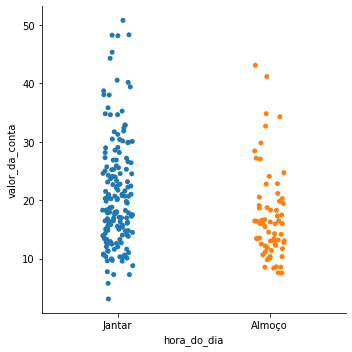

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

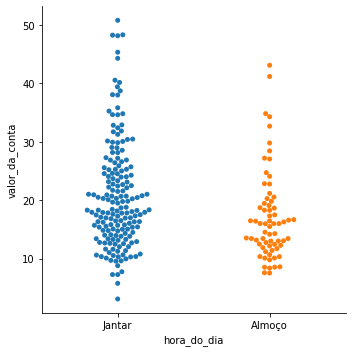

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

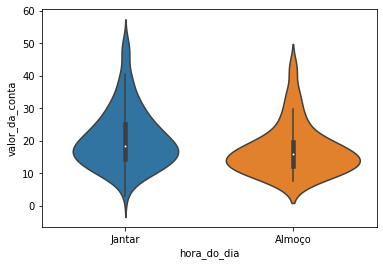

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

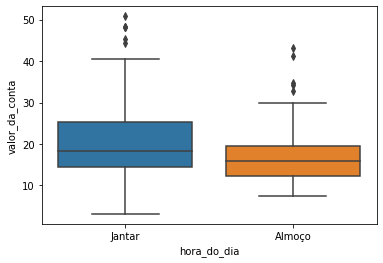

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

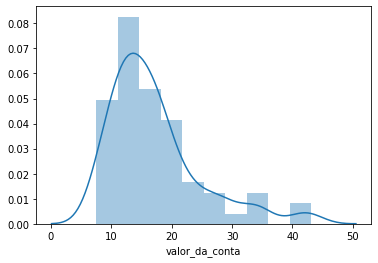

In [ ]:
sns.distplot(almoco)

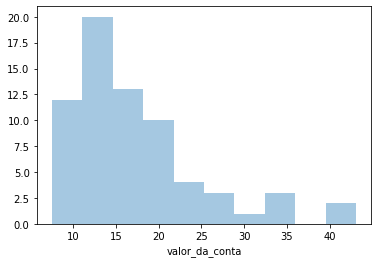

In [ ]:
sns.distplot(almoco, kde=False)

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

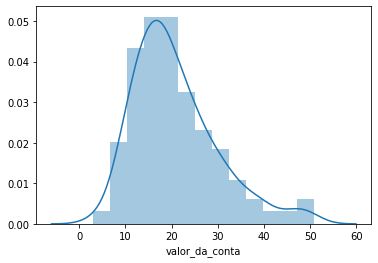

In [ ]:
sns.distplot(jantar)

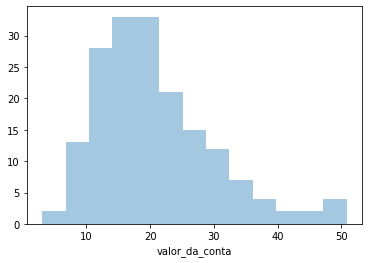

In [ ]:
sns.distplot(jantar, kde=False)

**Teste de hipótese 2**

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.168676,2.728088,2.411765,0.163971
Jantar,20.797159,3.102670,2.630682,0.159773


In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [ ]:
r2 = ranksums(jantar, almoco)

In [ ]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [ ]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [ ]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)